In [218]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [219]:
#let's read the data and store it in variable, also data set shape, number of rows and columns
dataSet = pd.read_csv("train.csv")
dataSet.shape

(1460, 81)

In [220]:
#looking at data top 5 rows
dataSet.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [221]:
#increasing limit of columns to see all the columns
pd.set_option('display.max_columns',100)

In [222]:
dataSet.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [223]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [224]:
#looking at all the columns
dataSet.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [225]:
#storing the Numerical and Categorical features 
numeric_df = dataSet.select_dtypes(include=['int64', 'float64'])
categorical_df = dataSet.select_dtypes(include=['object'])

In [226]:
#Checking number of null values present in data set
def missingVal(data):
    missingVal = data.isna().sum() 
    return missingVal.loc[missingVal > 0]
missingVal(dataSet)

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [227]:
#checking percentage of null values
missingValPer = dataSet.isnull().mean() * 100
missingValPer.loc[missingValPercentage > 0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [228]:
#looking at all the categorical values given in data set
categorical_df.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [229]:
#finding percentage of missing values in catagorical variable
for missingValue in categorical_df:
    if categorical_df[missingValue].isnull().any():
        print(missingValue, ':', round(categorical_df[missingValue].isnull().sum()/categorical_df.shape[0], 2)*100)

Alley : 94.0
MasVnrType : 1.0
BsmtQual : 3.0
BsmtCond : 3.0
BsmtExposure : 3.0
BsmtFinType1 : 3.0
BsmtFinType2 : 3.0
Electrical : 0.0
FireplaceQu : 47.0
GarageType : 6.0
GarageFinish : 6.0
GarageQual : 6.0
GarageCond : 6.0
PoolQC : 100.0
Fence : 81.0
MiscFeature : 96.0


In [230]:
#looking at Alley column values
dataSet.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In Alley: Type of alley access to property
there are three catagories
       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
       
here NA means no alley access so we will keep this value for prediction as it is important value in perspective of purchasing any house

In [231]:
dataSet_filled = dataSet

In [232]:
dataSet_filled['Alley'] = dataSet_filled['Alley'].fillna('Noaccess')

In [233]:
dataSet_filled.Alley.value_counts()

Noaccess    1369
Grvl          50
Pave          41
Name: Alley, dtype: int64

In [234]:
#looking at PoolQC column values
dataSet.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In PoolQC: Pool quality
there are 5 catagories	
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
       
NA means there are no pools

In [235]:
dataSet_filled['PoolQC'] = dataSet_filled['PoolQC'].fillna('Nopool')
dataSet_filled.PoolQC.value_counts()

Nopool    1453
Gd           3
Ex           2
Fa           2
Name: PoolQC, dtype: int64

In [236]:
#looking at Fence column values
dataSet.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

In [237]:
dataSet_filled['Fence'] = dataSet_filled['Fence'].fillna('Nofence')
dataSet_filled.Fence.value_counts()

Nofence    1179
MnPrv       157
GdPrv        59
GdWo         54
MnWw         11
Name: Fence, dtype: int64

In [238]:
dataSet.MiscFeature.value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

In [239]:
dataSet_filled['MiscFeature'] = dataSet_filled['MiscFeature'].fillna('missingValue')
dataSet_filled.MiscFeature.value_counts()

missingValue    1406
Shed              49
Gar2               2
Othr               2
TenC               1
Name: MiscFeature, dtype: int64

Not dropping below mentioned columns
- Alley: Type of alley access to property
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories.

as they have having very meaningfull values in form of NA.

In [240]:
#lets impute all the other null values 
featuresWithNullValues = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'FireplaceQu']
print(dataSet_filled[featuresWithNullValues].isnull().sum())

BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
FireplaceQu     690
dtype: int64


In [241]:
# Imputing missing values with "Not_applicable"
dataSet_filled[featuresWithNullValues] = dataSet_filled[featuresWithNullValues].fillna(value='Not_applicable', axis=1)

# Checking after imputation
print(dataSet_filled[featuresWithNullValues].isnull().sum())

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
FireplaceQu     0
dtype: int64


<AxesSubplot:>

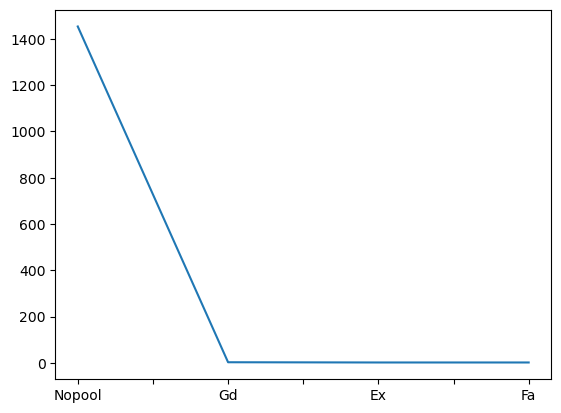

In [242]:
dataSet_filled['PoolQC'].value_counts().plot()

In [243]:
cols = [var for var in dataSet.columns if dataSet[var].isnull().mean() < 0.05 and dataSet[var].isnull().mean() > 0]
cols

['MasVnrType', 'MasVnrArea', 'Electrical']

In [244]:
#dropping PoolQC because it is having heighly imbalance data
dataSet_filled.drop(['PoolQC'], axis=1, inplace=True)

In [245]:
dataSet_filled['Electrical'].isnull().sum()

1

In [246]:
#removing row containing Electrical value as null
dataSet_filled.dropna(subset=['Electrical'], inplace=True)

## Checking for outlier percentage

In [247]:
#checking outlier in all the numerical values in data set

outliers_percentage={}

for feature in numeric_df.columns:
    IQR=numeric_df[feature].quantile(.75)-numeric_df[feature].quantile(.25)
    outliers_count=numeric_df[(numeric_df[feature]>(numeric_df[feature].quantile(.75)+1.5*IQR)) | (numeric_df[feature]<(numeric_df[feature].quantile(.25)-1.5*IQR))].shape[0]
    outliers_percentage[feature]=round(outliers_count/numeric_df.shape[0]*100,2)
    
outlier_df=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

,Features,Percentage
30,EnclosedPorch,14.25
10,BsmtFinSF2,11.44
5,OverallCond,8.56
32,ScreenPorch,7.95
1,MSSubClass,7.05
8,MasVnrArea,6.58
2,LotFrontage,6.03
18,BsmtHalfBath,5.62
29,OpenPorchSF,5.27
3,LotArea,4.73


Dropping all the outliers will cause loss of information
assigning IQR = Difference between 75th percentile and 25th percentile values of a feature.


In [248]:
for feature,percentage in outliers_percentage.items():
    if feature!='SalePrice':
        IQR = dataSet_filled[feature].quantile(.75) - dataSet_filled[feature].quantile(.25) 
        max_value = dataSet_filled[feature].quantile(.75)+1.5*IQR
        min_value = dataSet_filled[feature].quantile(.25)-1.5*IQR
        dataSet_filled[feature][dataSet_filled[feature] > max_value] = max_value
        dataSet_filled[feature][dataSet_filled[feature] < min_value ] = min_value

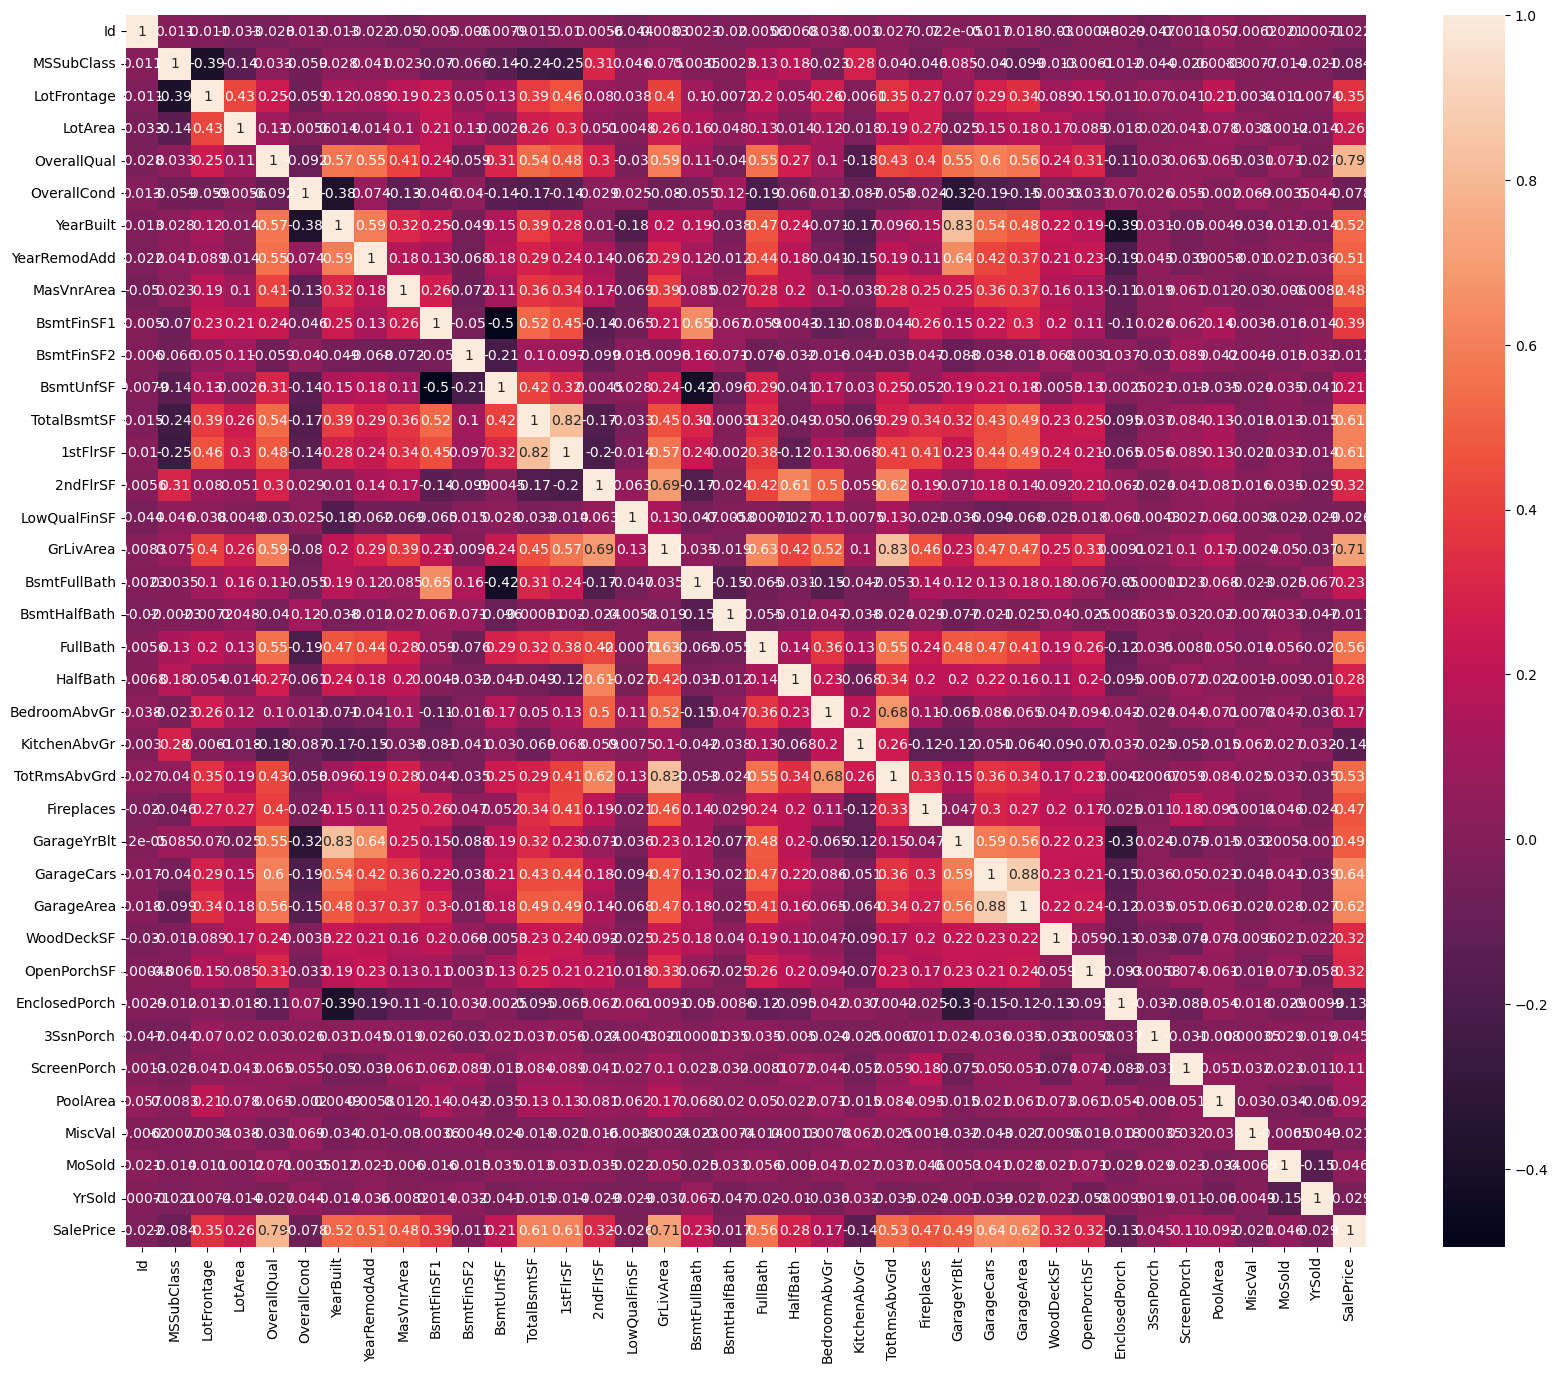

In [249]:
#Checking correlation in numerical features using heat map
plt.figure(figsize=(20,16))
sns.heatmap(numeric_df.corr(),annot=True)
plt.show()

Some of the features have high correlation with each other

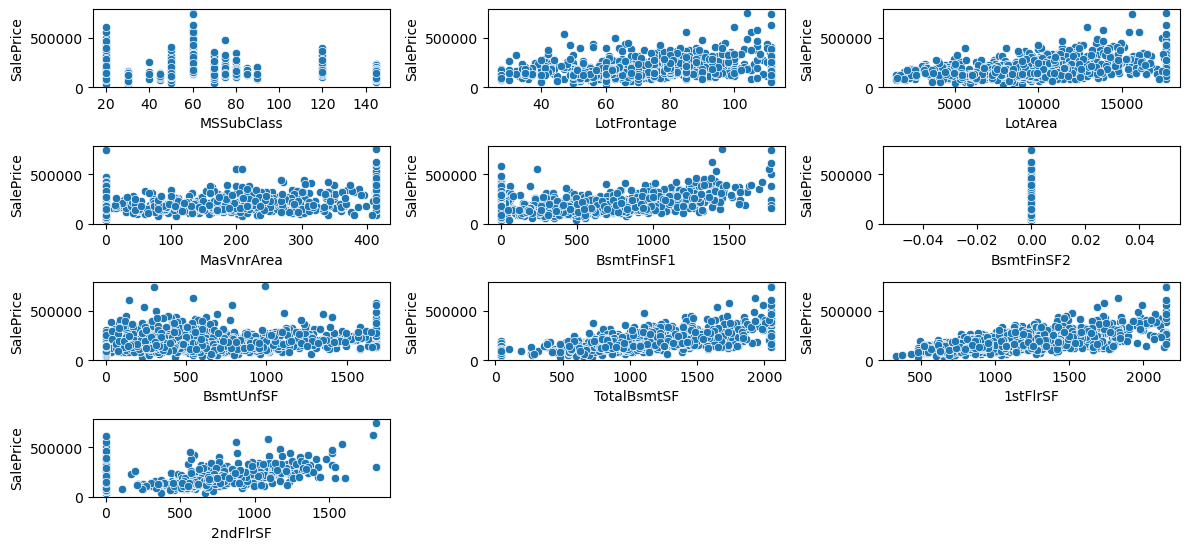

In [250]:
#analyzing numerical features with continuous values
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(dataSet_filled[feature], dataSet_filled['SalePrice'])
    plt.tight_layout()

In [251]:
# 'BsmtFinSF2' has single value and can be dropped.
dataSet_filled.drop(['BsmtFinSF2'], axis=1, inplace=True)

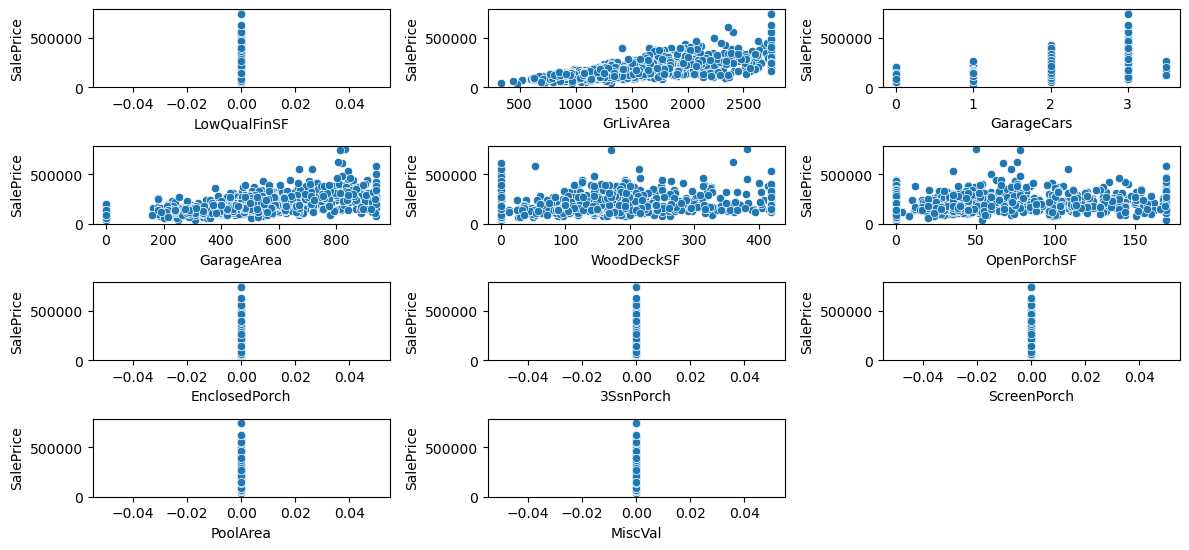

In [252]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['LowQualFinSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(dataSet_filled[feature], dataSet_filled['SalePrice'])
    plt.tight_layout()

In [253]:
#'LowQualFinSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal' features have single values and can be dropped.
dataSet_filled.drop(['LowQualFinSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1, inplace=True)

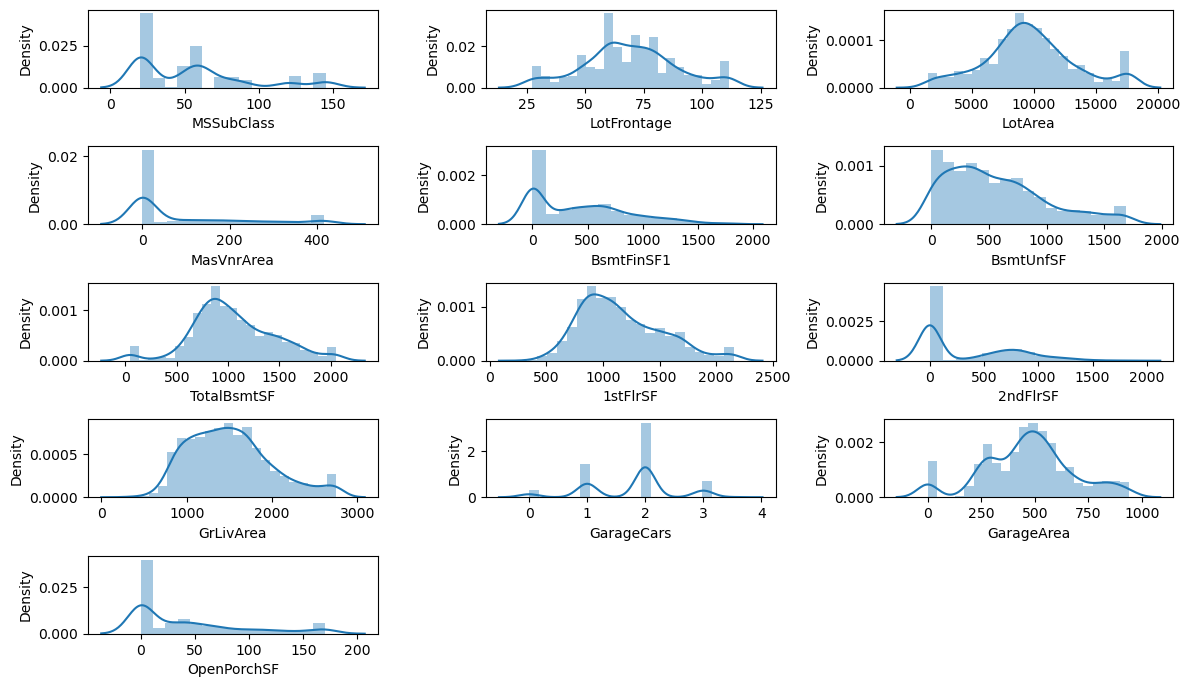

In [254]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','GrLivArea', 'GarageCars', 'GarageArea', 'OpenPorchSF']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.distplot(dataSet_filled[feature])
    plt.tight_layout()

In [255]:
dataSet_filled.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
count,1459.000000,1459.000000,1200.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1451.000000,1459.00000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.0,1459.000000,1459.000000,1459.000000,1459.0,1459.000000,1459.000000,1378.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,730.054832,55.068540,69.131667,9647.797807,6.101439,5.543866,1971.275531,1984.850583,90.254307,440.30209,563.900960,1050.721899,1157.302947,346.588074,1503.866861,0.425291,0.0,1.564770,0.382454,2.851611,1.0,6.487320,0.611720,1978.485486,1.765250,470.751542,91.801234,42.632625,6.322824,2007.815627,180930.394791
std,421.411181,37.515366,19.669903,3596.693722,1.378601,0.963921,30.104997,20.644343,134.950972,433.22393,431.832554,397.685738,362.577218,435.873361,481.676406,0.517431,0.0,0.550987,0.502798,0.759767,0.0,1.542386,0.638977,24.686740,0.742982,207.241765,116.697922,52.507724,2.704331,1.328542,79468.964025
min,1.000000,20.000000,27.500000,1468.000000,2.000000,3.500000,1885.000000,1950.000000,0.000000,0.00000,0.000000,42.250000,334.000000,0.000000,334.000000,0.000000,0.0,0.000000,0.000000,0.500000,1.0,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.500000,20.000000,59.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.00000,223.000000,796.000000,882.000000,0.000000,1129.000000,0.000000,0.0,1.000000,0.000000,2.000000,1.0,5.000000,0.000000,1961.000000,1.000000,333.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000
50%,730.000000,50.000000,69.000000,9477.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,384.00000,479.000000,992.000000,1088.000000,0.000000,1464.000000,0.000000,0.0,2.000000,0.000000,3.000000,1.0,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,6.000000,2008.000000,163000.000000
75%,1094.500000,70.000000,80.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.50000,808.000000,1298.500000,1391.500000,728.000000,1777.500000,1.000000,0.0,2.000000,1.000000,3.000000,1.0,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,8.000000,2009.000000,214000.000000
max,1460.000000,145.000000,111.500000,17684.000000,10.000000,7.500000,2010.000000,2010.000000,415.000000,1781.25000,1685.500000,2052.250000,2155.750000,1820.000000,2750.250000,2.500000,0.0,3.000000,2.000000,4.500000,1.0,10.000000,2.500000,2010.000000,3.500000,940.500000,420.000000,170.000000,12.000000,2010.000000,755000.000000


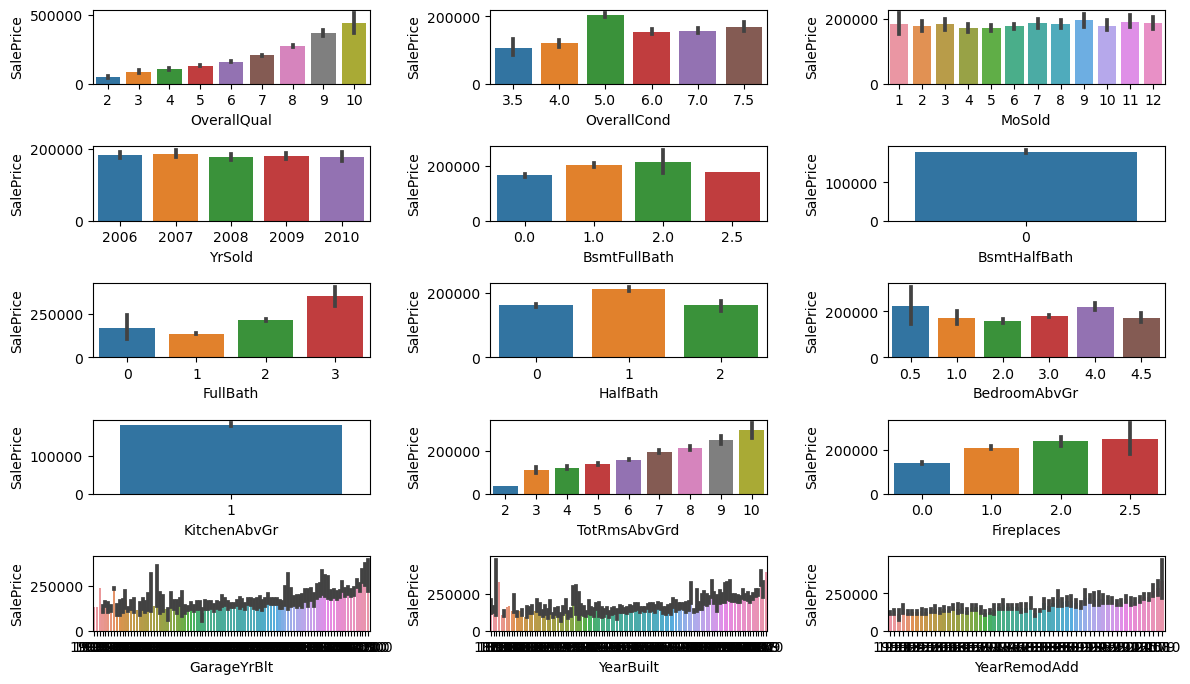

In [256]:
#Analyzing Numerical Features with Discrete Values
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.barplot(dataSet_filled[feature], dataSet_filled['SalePrice'])
    plt.tight_layout()

In [257]:
dataSet_filled.KitchenAbvGr.value_counts()

1    1459
Name: KitchenAbvGr, dtype: int64

In [258]:
#only 1 value of KitchenAbvGr, so dropping KitchenAbvGr
dataSet_filled.drop(['KitchenAbvGr'], axis=1, inplace=True)

<AxesSubplot:>

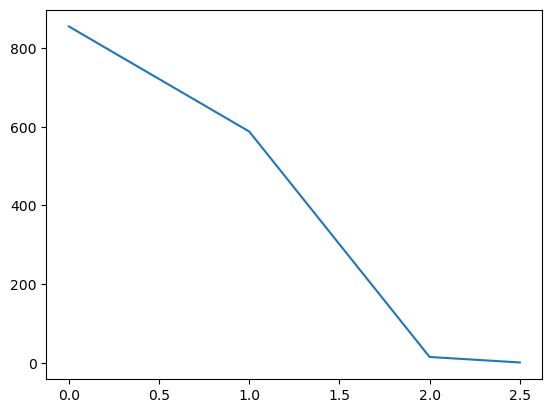

In [259]:
dataSet_filled.BsmtFullBath.value_counts().plot()

In [260]:
# Converting the year related features into number of years

for feature in ['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']:
    dataSet_filled[feature] = 2021 - dataSet_filled[feature]

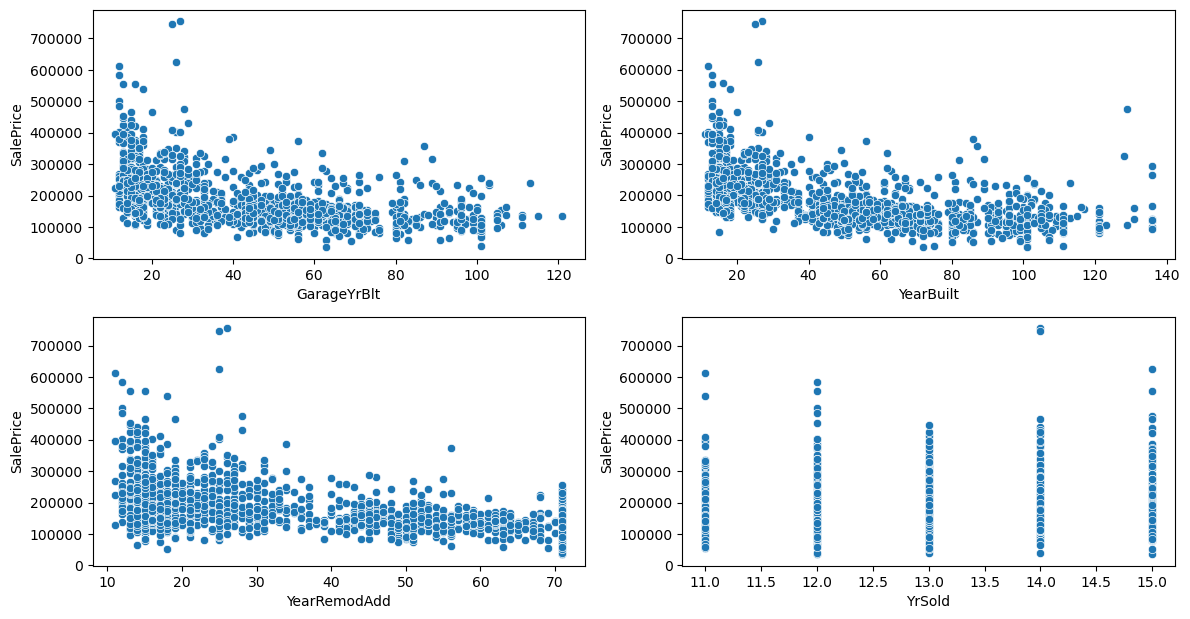

In [261]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(dataSet_filled[feature], dataSet_filled['SalePrice'])
    plt.tight_layout()

In [262]:
#Checking number of null values present in data set
def missingVal(data):
    missingVal = data.isna().sum() 
    return missingVal.loc[missingVal > 0]
missingVal(dataSet_filled)

LotFrontage    259
MasVnrType       8
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [263]:
#dropping id column and dropping rows contaning null value for MasVnrArea
dataSet_filled.drop(['Id'], axis=1, inplace=True)
dataSet_filled.dropna(subset=['MasVnrArea'], inplace=True)

In [264]:
dataSet_filled.shape

(1451, 71)

In [265]:
#Dropping columns as the correlation coefficient is very heigh
dataSet_filled.drop(['GarageCars', 'GarageYrBlt', 'GrLivArea', 'TotalBsmtSF'], axis=1, inplace=True)


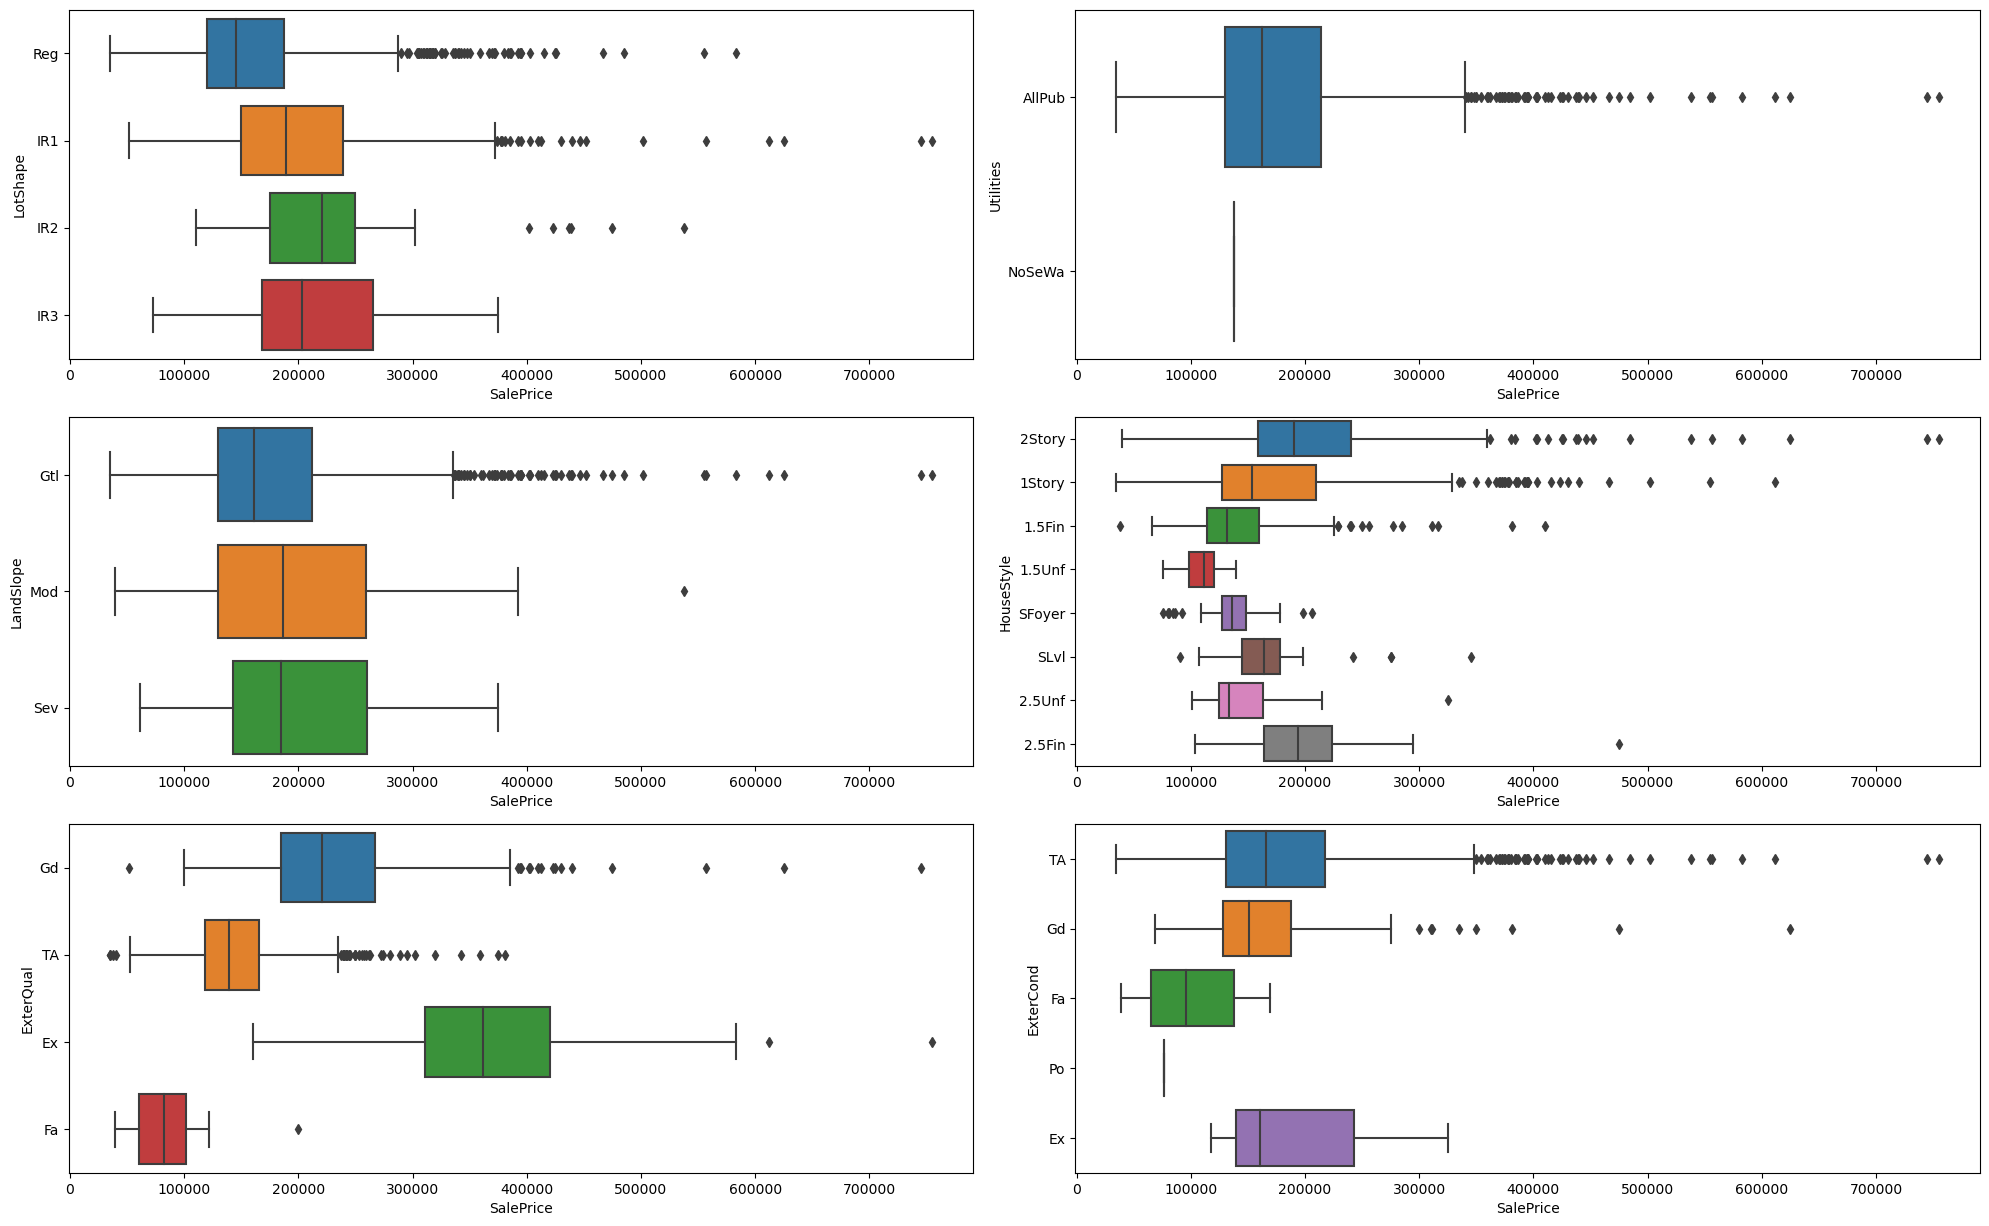

In [266]:
#analyzing features
def generate_boxplot(feature_list):
    fig=plt.subplots(figsize=(20, 16))
    for i, feature in enumerate(feature_list):
        plt.subplot(4, 2, i+1)
        plt.subplots_adjust(hspace = 2.0)
        sns.boxplot(dataSet_filled['SalePrice'], dataSet_filled[feature])
        plt.tight_layout()
ext_features = ['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond']

generate_boxplot(ext_features)

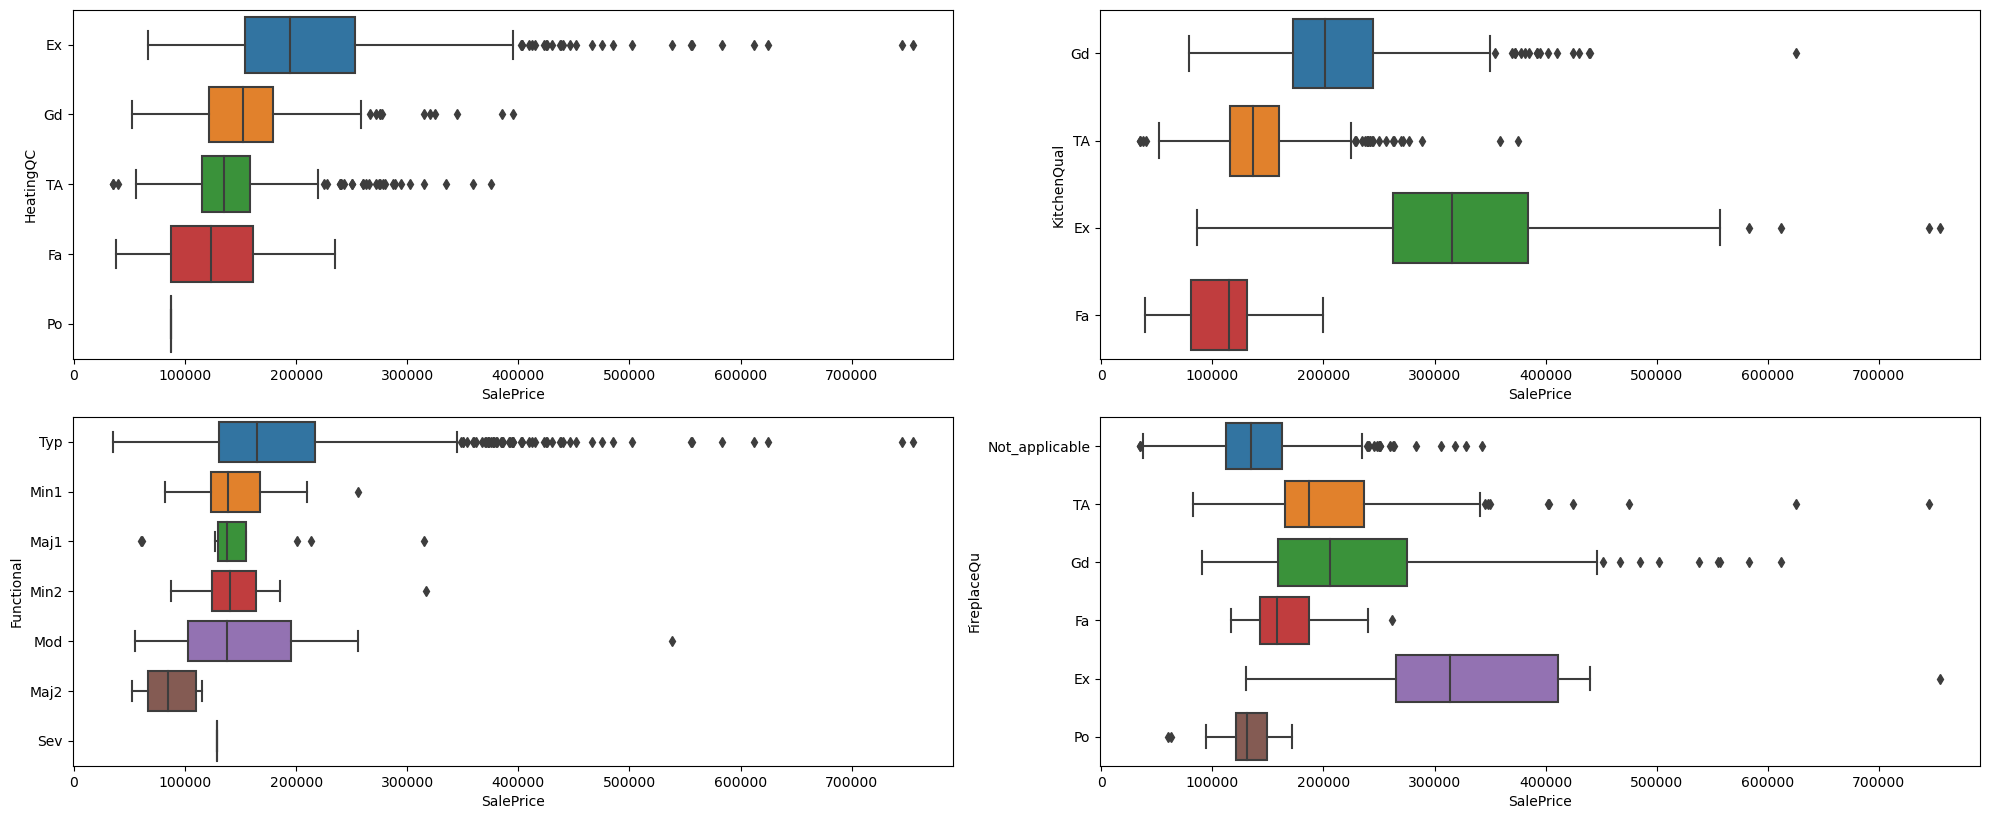

In [267]:
int_features = ['HeatingQC', 'KitchenQual','Functional','FireplaceQu']

generate_boxplot(int_features)

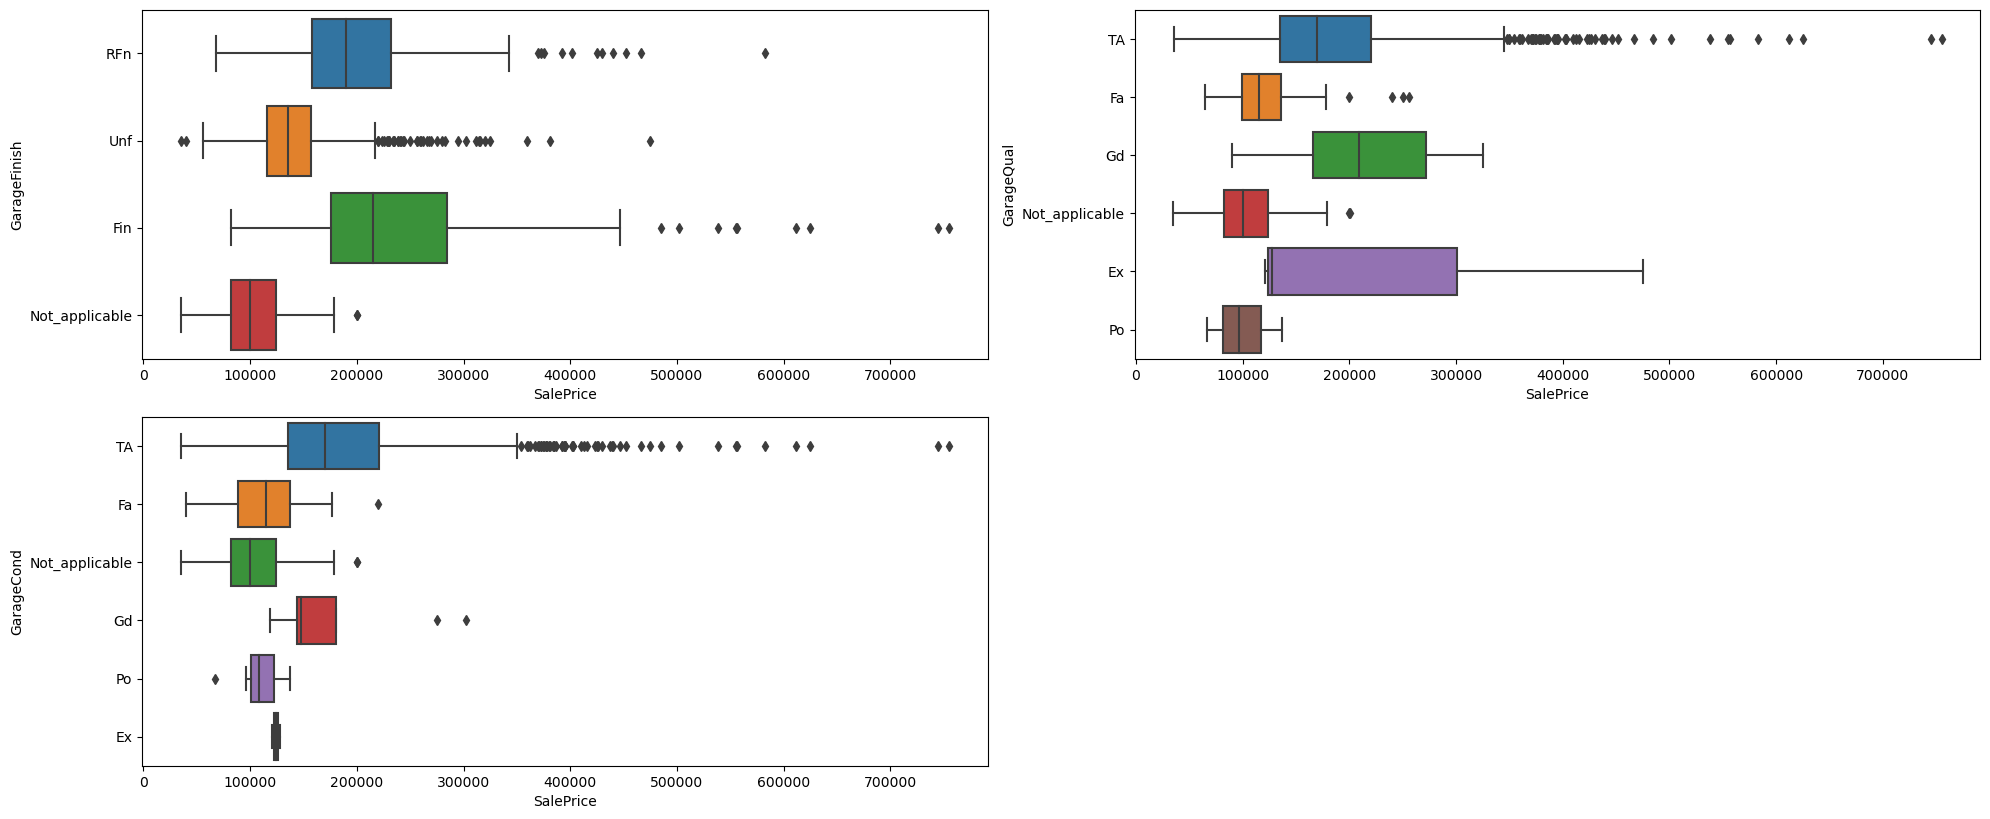

In [268]:
garage_features = ['GarageFinish', 'GarageQual','GarageCond']

generate_boxplot(garage_features)

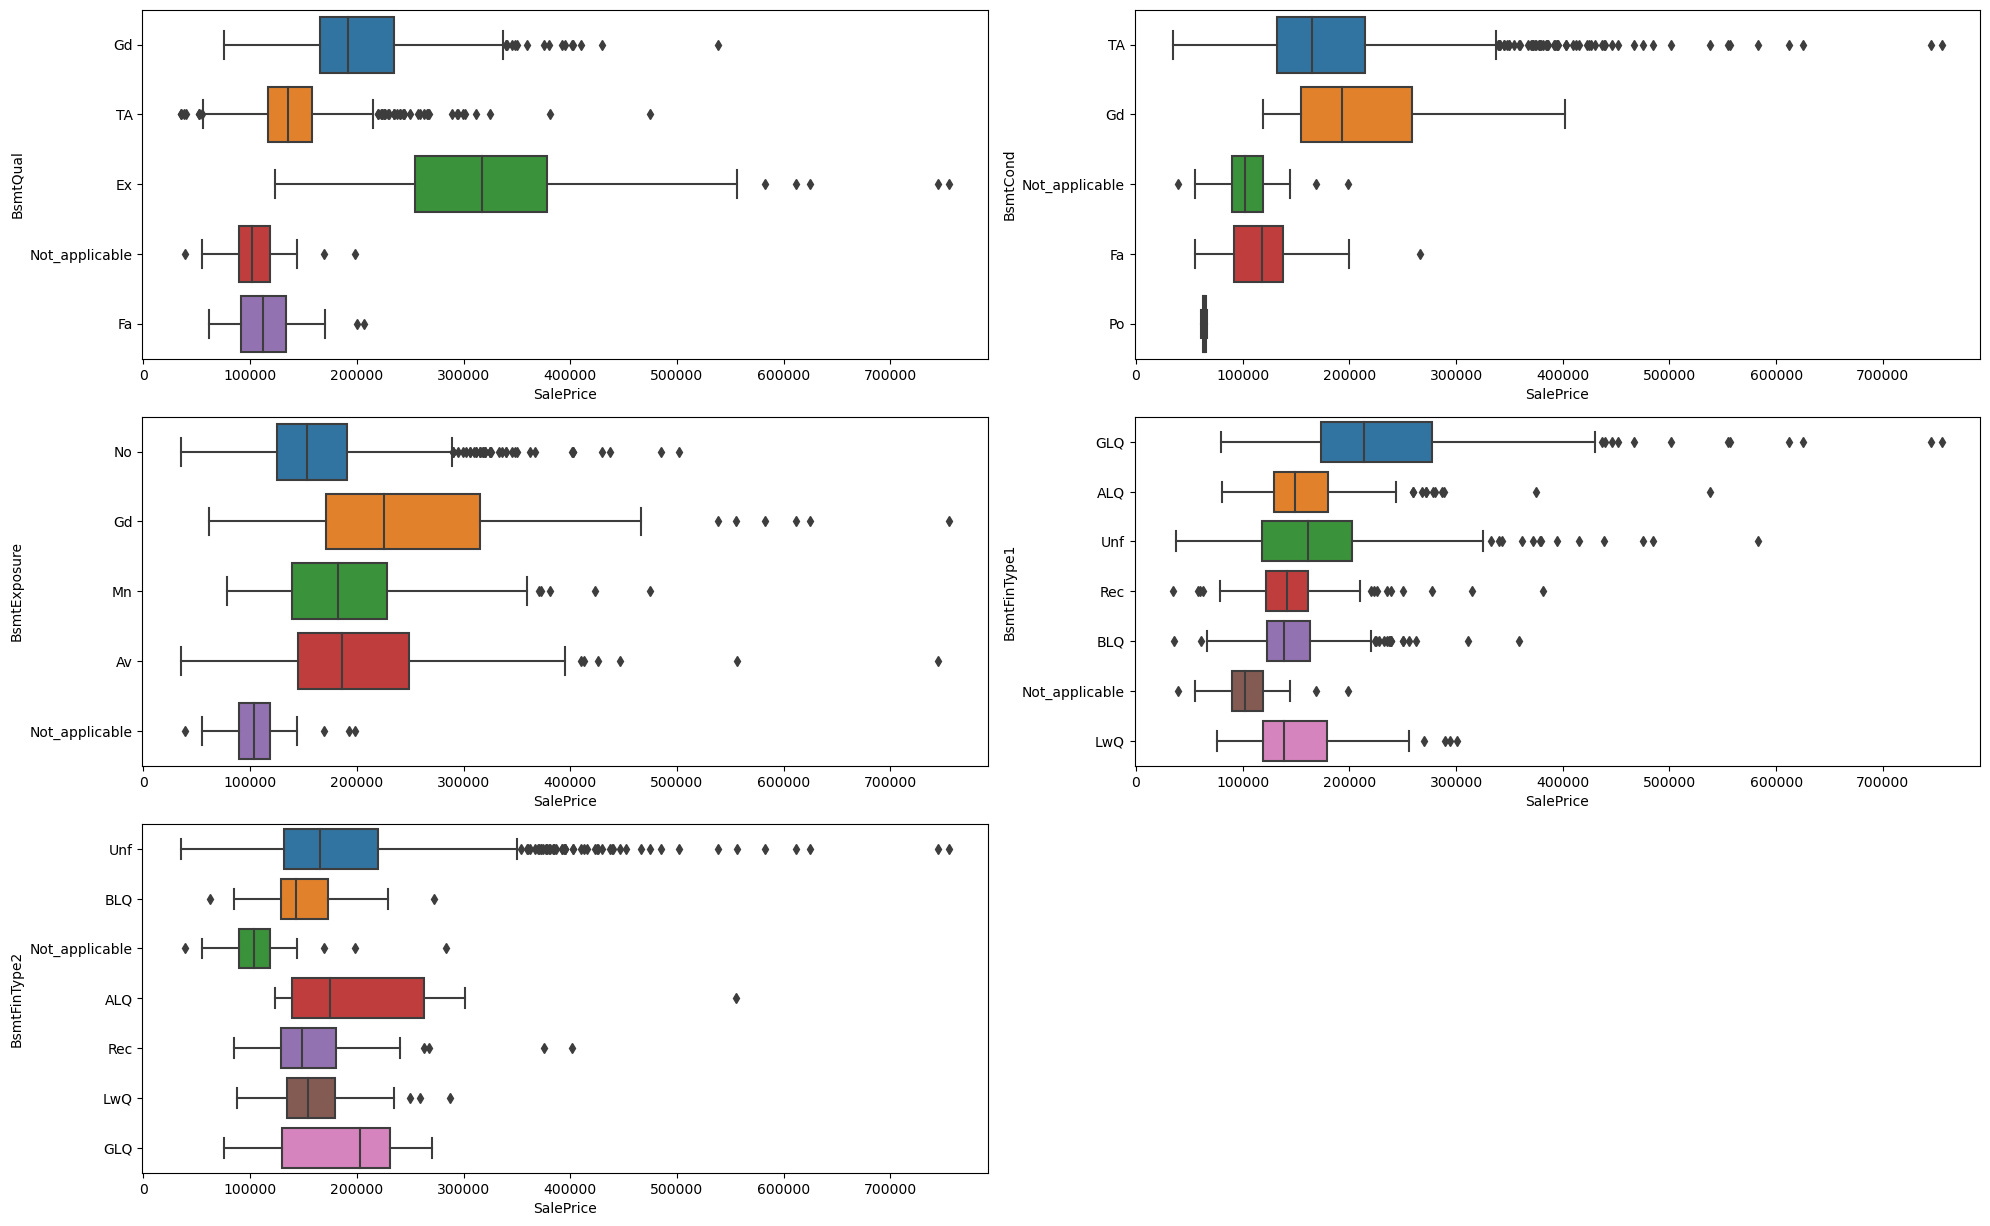

In [269]:
basement_features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

generate_boxplot(basement_features)

In [270]:
# Let's convert categorical variable to numeric. we convert categorical variables into factors i.e number

dataSet_filled['LotShape'] = dataSet_filled['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
dataSet_filled['Utilities'] = dataSet_filled['Utilities'].map({'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0})
dataSet_filled['LandSlope'] = dataSet_filled['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
dataSet_filled['HouseStyle'] = dataSet_filled['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7})
dataSet_filled['ExterQual'] = dataSet_filled['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
dataSet_filled['ExterCond'] = dataSet_filled['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
dataSet_filled['BsmtQual'] = dataSet_filled['BsmtQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
dataSet_filled['BsmtCond'] = dataSet_filled['BsmtCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
dataSet_filled['BsmtExposure'] = dataSet_filled['BsmtExposure'].map({'Not_applicable':0,'No':1,'Mn':2,'Av':3,'Gd':4})
dataSet_filled['BsmtFinType1'] = dataSet_filled['BsmtFinType1'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
dataSet_filled['BsmtFinType2'] = dataSet_filled['BsmtFinType2'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
dataSet_filled['HeatingQC'] = dataSet_filled['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
dataSet_filled['CentralAir'] = dataSet_filled['CentralAir'].map({'N':0,'Y':1})
dataSet_filled['KitchenQual'] = dataSet_filled['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
dataSet_filled['GarageFinish'] = dataSet_filled['GarageFinish'].map({'Not_applicable':0,'Unf':1,'RFn':2,'Fin':3})
dataSet_filled['GarageQual'] = dataSet_filled['GarageQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
dataSet_filled['GarageCond'] = dataSet_filled['GarageCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
dataSet_filled['Functional'] = dataSet_filled['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})
dataSet_filled['FireplaceQu'] = dataSet_filled['FireplaceQu'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [271]:
#encoding categorical variables
unordered_features = ['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 
'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition']
dummy_df = pd.get_dummies(dataSet_filled[unordered_features], drop_first=True)

In [272]:
dummy_df.shape

(1451, 144)

In [273]:
dummies_to_drop = []
for feat in dummy_df.columns:
    if dummy_df[feat].value_counts()[0]/dummy_df.shape[0] >= 0.95:
        dummies_to_drop.append(feat)
        
print(dummies_to_drop)
print(len(dummies_to_drop))

['MSZoning_FV', 'MSZoning_RH', 'Alley_Pave', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',

In [274]:
# Dropping the highly imbalanced dummy variables

dummy_df = dummy_df.drop(dummies_to_drop, axis=1)

print(dummy_df.shape)

(1451, 52)


In [275]:
# Adding the dummy variables to the original dataframe
dataSet_filled = pd.concat([dataSet_filled,dummy_df],axis=1)

# Dropping the redundant columns
dataSet_filled = dataSet_filled.drop(unordered_features,axis=1)

In [276]:
dataSet_filled.shape

(1451, 96)

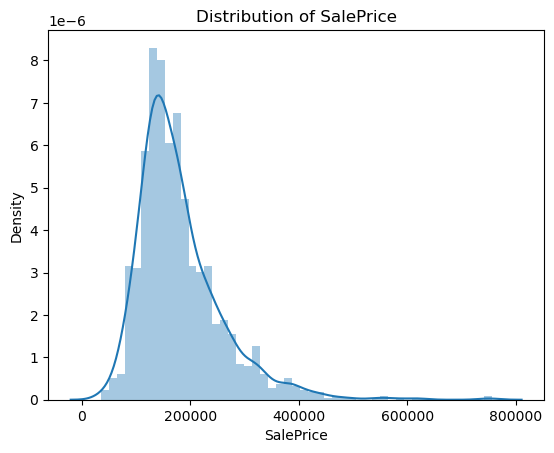

In [277]:
# Checking the distribution of target variable, SalePrice

plt.title('Distribution of SalePrice')
sns.distplot(dataSet_filled['SalePrice'])
plt.show()

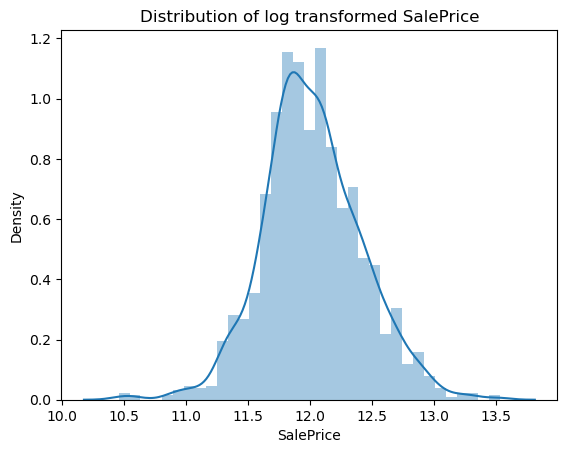

In [278]:
#target variable is right skewed, check after transformation
sns.distplot(np.log(dataSet_filled['SalePrice']))
plt.title('Distribution of log transformed SalePrice')
plt.show()

In [279]:
# log transformed SalePrice is normally distributed, so transformed data will be used for model building

y = np.log(dataSet_filled['SalePrice'])

In [280]:
#splitting train test data
X = dataSet_filled.drop(['SalePrice'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

LotFrontage: Linear feet of street connected to property

In [281]:
dataSet.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      52
        ... 
106.0      1
111.0      1
33.0       1
39.0       1
46.0       1
Name: LotFrontage, Length: 83, dtype: int64

In [282]:
dataSet.LotFrontage.median()

69.0

In [283]:
dataSet.LotFrontage.mode()

0    60.0
Name: LotFrontage, dtype: float64

<AxesSubplot:ylabel='Density'>

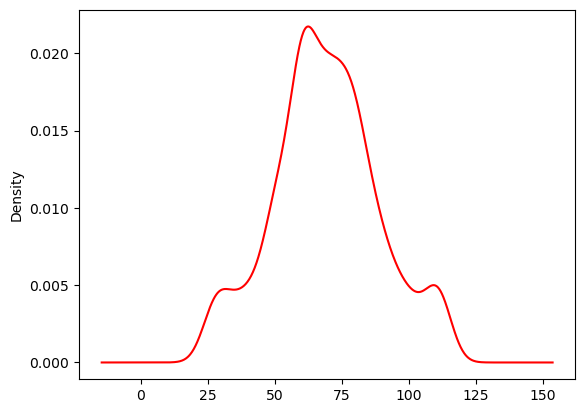

In [284]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
dataSet['LotFrontage'].plot.density(color='red')

# data after cca
#new_df['training_hours'].plot.density(color='green')

In [285]:
# Imputing missing value of LotFrontage after splitting training and test set 

si = SimpleImputer(missing_values=np.nan, strategy='mean')
si.fit(X_train[['LotFrontage']])

SimpleImputer()

In [286]:
dataSet['LotFrontage'].isna().sum()


257

In [287]:
X_train[['LotFrontage']] = si.transform(X_train[['LotFrontage']])

In [288]:
X_test[['LotFrontage']] = si.transform(X_test[['LotFrontage']])

In [289]:
ss = StandardScaler()
ss.fit(X_train)
X_tr_scaled = pd.DataFrame(data=ss.transform(X_train), columns=X_train.columns)
X_te_scaled = pd.DataFrame(data=ss.transform(X_test), columns=X_test.columns)

In [290]:
#Feature selection
# Given the number of features = n, the functions prints and returns top n features selected by RFE

def top_n_features(n):
    top_n_cols = []
    
    linear_m = LinearRegression()
    linear_m.fit(X_tr_scaled, y_train)
    rfe = RFE(linear_m, step =  n)
    rfe = rfe.fit(X_tr_scaled, y_train)
    
    print("Top %d features : " %n)
    rfe_ranking = list(zip(X_tr_scaled.columns,rfe.support_,rfe.ranking_))
    
    for i in rfe_ranking:
        if i[1]:
            top_n_cols.append(i[0])
    print(top_n_cols)
    return top_n_cols

In [291]:
top_45 = top_n_features(45)
top_50 = top_n_features(50)
top_55 = top_n_features(55)

Top 45 features : 
['LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtQual', 'BsmtFinSF1', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageArea', 'GarageQual', 'MSZoning_RL', 'Neighborhood_Edwards', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Condition1_Feedr', 'Condition1_Norm', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_HdBoard', 'Exterior1st_Plywood', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_Plywood', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_PConc', 'Heating_GasA', 'GarageType_Attchd', 'GarageType_Detchd', 'GarageType_Not_applicable', 'PavedDrive_Y', 'SaleCondition_Normal', 'SaleCondition_Partial']
Top 50 features : 
['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'HeatingQC', 'Centr

In [292]:
def build_regressor(X_train,y_train,cols):
    X_train_ols = sm.add_constant(X_train[cols])
    lin_reg = sm.OLS(y_train.values.reshape(-1,1), X_train_ols).fit()
    print(lin_reg.summary())    

In [293]:
# Reusable Code Block for Cross-validation, Model Building and Model Evaluation

def build_model(X_train, y_train, X_test, params, model='ridge'):
  if model == 'ridge':
    estimator_model = Ridge()
  else:
    estimator_model = Lasso()
  model_cv = GridSearchCV(estimator = estimator_model, 
                          param_grid = params, 
                          scoring= 'neg_mean_absolute_error', 
                          cv = 5, 
                          return_train_score=True,
                          verbose = 1)            
  model_cv.fit(X_train, y_train)
  alpha = model_cv.best_params_["alpha"]
  print("Optimum alpha for %s is %f" %(model, alpha))
  final_model = model_cv.best_estimator_

  final_model.fit(X_train, y_train)
  y_train_pred = final_model.predict(X_train)
  y_test_pred = final_model.predict(X_test)
 
  # Model Evaluation
  print(model," Regression with ",alpha)
  print("===================================")
  print('R2 score (train) : ',r2_score(y_train,y_train_pred))
  print('R2 score (test) : ',r2_score(y_test,y_test_pred))
  print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
  print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

  return final_model, y_test_pred

In [294]:
X_train_rfe = X_tr_scaled[top_50]
X_test_rfe = X_te_scaled[top_50]

In [295]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='ridge')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimum alpha for ridge is 20.000000
ridge  Regression with  20
R2 score (train) :  0.911923061550144
R2 score (test) :  0.8724343460311603
RMSE (train) :  0.11622293134279751
RMSE (test) :  0.1527000579400255


In [296]:
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}

lasso_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='lasso')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Optimum alpha for lasso is 0.001000
lasso  Regression with  0.001
R2 score (train) :  0.9111404140856251
R2 score (test) :  0.8754870819779288
RMSE (train) :  0.11673816499476414
RMSE (test) :  0.1508618841817115


In [297]:
model_coefficients = pd.DataFrame(index=X_test_rfe.columns)
model_coefficients.rows = X_test_rfe.columns

model_coefficients['Ridge (alpha=9.0)'] = ridge_final_model.coef_
model_coefficients['Lasso (alpha=0.0001)'] = lasso_final_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

,Ridge (alpha=9.0),Lasso (alpha=0.0001)
MSSubClass,0.000429,-0.000000
LotArea,0.038608,0.037730
OverallQual,0.083958,0.086897
OverallCond,0.050716,0.051833
YearBuilt,-0.050393,-0.054254
BsmtFinSF1,0.045745,0.043194
BsmtUnfSF,0.018754,0.014507
HeatingQC,0.014858,0.014836
CentralAir,0.012540,0.010915
1stFlrSF,0.111799,0.119619


In [298]:
# 50 features ordered by feature importance in Lasso Regression

model_coefficients[['Lasso (alpha=0.0001)']].sort_values(by='Lasso (alpha=0.0001)', ascending=False)

,Lasso (alpha=0.0001)
1stFlrSF,0.119619
2ndFlrSF,0.112223
OverallQual,0.086897
OverallCond,0.051833
BsmtFinSF1,0.043194
LotArea,0.037730
SaleCondition_Partial,0.034670
SaleCondition_Normal,0.027444
MSZoning_RL,0.026845
Condition1_Norm,0.025698


In [299]:
model_coefficients[['Lasso (alpha=0.0001)']].sort_values(by='Lasso (alpha=0.0001)', ascending=False).index[:10]

Index(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'LotArea', 'SaleCondition_Partial', 'SaleCondition_Normal',
       'MSZoning_RL', 'Condition1_Norm'],
      dtype='object')

Summery
1. The housing dataset was thoroughly analyzed, including feature examination, missing value handling, and outlier detection, to prepare for modeling.

2. Categorical variables were encoded, and dummy variables were created, significantly expanding the feature set.

3. Feature scaling and transformation of the target variable (SalePrice) were performed to ensure model stability and accuracy.

4. Top features were selected using Recursive Feature Elimination (RFE) to streamline the model.

5. Ridge and Lasso regression models were built and fine-tuned using cross-validation to predict SalePrice accurately.

6. The final models were evaluated based on their R-squared scores and root mean squared errors (RMSE) on both training and test datasets.

7. Lasso regression, with an alpha of 0.0001, emerged as the preferred model for its superior performance and feature selection capabilities.

8. Feature importance was analyzed, revealing key predictors such as OverallQual, GrLivArea, and Neighborhood.

9. Model coefficients were examined, highlighting the significant impact of certain features on predicting SalePrice.

10. The project successfully addressed data preprocessing, model selection, and feature engineering to create a robust predictive model for housing prices.